<a href="https://colab.research.google.com/github/RichardMackMarvel00/SPICE-2024/blob/main/File_2016_2019WVHTproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

The goal is to use machine learning to build a time-series model that can be used to predict wave height measurements for the selected buoy area. We'll be building an ARIMA model.

The dataset comes from the National Data Buoy Center.

The buoy used for this example is Buoy #51000, which is located Northeast of Oahu, Hawaii.

### ARIMA



You can read this article for more info. https://medium.com/analytics-vidhya/arima-for-dummies-ba761d59a051

# Imports and Data

The below code chunk loads in all your packages and imports, make sure to run this every time you start your session.

Packages include all the tools you need to successfully run all your code and analysis.

#Run Packages


In [5]:
!pip install statsmodels
!pip install pmdarima
!pip install seaborn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime
import pandas as pd
import pandas as pd
from io import StringIO
#import pmdarima as pm
import itertools
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00


#Data Sets


To load in our datasets, we use the pandas function read_csv to get the data directly from the National Data Buoy Center and are assigning it to the variable called df16(etc.).

A variable is a place/object where we can store information.

In [6]:
df16 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2016.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df17 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2017.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df18 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2018.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data
df19 = pd.read_csv('https://www.ndbc.noaa.gov/view_text_file.php?filename=51000h2019.txt.gz&dir=data/historical/stdmet/', delimiter= '\s+', index_col=False) # reading in the data


#All Dataset intervals "mm" are 50.

In [9]:
df19



,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2018,12,31,23,50,90,8.4,9.8,2.87,10.00,7.11,81,1017.3,23.4,24.3,999.0,99.0,99.00
2,2019,01,01,00,50,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00
3,2019,01,01,01,50,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00
4,2019,01,01,02,50,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2019,12,31,18,50,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00
8671,2019,12,31,19,50,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00
8672,2019,12,31,20,50,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00
8673,2019,12,31,21,50,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00


# Data Cleaning

We need to clean our data to help our analysis run smoother and format it properly.

We'll be deleting the first row or two of our dataset as it just repeats the column names and has a row from 2016, and assigning it to a new variable called df16_clean.

In [7]:
df16_clean = df16.iloc[2:] # dropping the first two rows
df16_clean

df17_clean = df17.iloc[2:] # dropping the first two rows
df17_clean

df18_clean = df18.iloc[2:] # dropping the first two rows
df18_clean

df19_clean = df19.iloc[1:] # dropping the first two rows
df19_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2018,12,31,23,50,90,8.4,9.8,2.87,10.00,7.11,81,1017.3,23.4,24.3,999.0,99.0,99.00
2,2019,01,01,00,50,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00
3,2019,01,01,01,50,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00
4,2019,01,01,02,50,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00
5,2019,01,01,03,50,91,9.0,10.9,2.58,10.81,6.60,84,1018.6,23.7,24.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2019,12,31,18,50,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00
8671,2019,12,31,19,50,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00
8672,2019,12,31,20,50,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00
8673,2019,12,31,21,50,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00


In [8]:
df17_clean = df17.iloc[2:] # dropping the first two rows
df17_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2017,01,01,00,50,41,7.1,8.4,2.47,10.81,7.32,1,1013.3,21.4,23.7,999.0,99.0,99.00
3,2017,01,01,01,50,37,7.0,10.0,2.39,10.00,7.23,7,1013.5,21.3,23.7,999.0,99.0,99.00
4,2017,01,01,02,50,49,6.6,8.8,2.16,10.00,6.82,5,1014.1,21.2,23.7,999.0,99.0,99.00
5,2017,01,01,03,50,45,6.1,7.8,2.39,10.00,7.04,22,1014.6,21.1,23.7,999.0,99.0,99.00
6,2017,01,01,04,50,45,6.4,8.0,2.20,9.09,7.11,7,1015.0,21.3,23.6,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,2017,12,31,18,50,75,6.4,8.8,1.38,8.33,5.58,40,1020.2,21.0,23.0,999.0,99.0,99.00
8698,2017,12,31,19,50,63,6.5,8.1,1.50,8.33,5.85,41,1020.5,21.6,23.0,999.0,99.0,99.00
8699,2017,12,31,20,50,71,6.3,8.9,1.50,14.81,5.83,267,1020.4,21.9,23.0,999.0,99.0,99.00
8700,2017,12,31,21,50,60,7.4,9.1,1.43,8.33,5.55,32,1019.8,21.9,23.0,999.0,99.0,99.00


In [9]:
df18_clean = df18.iloc[2:] # dropping the first two rows
df18_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2,2018,01,01,00,50,61,6.7,8.0,1.46,7.69,5.37,40,1018.1,22.1,23.0,999.0,99.0,99.00
3,2018,01,01,01,50,54,6.6,7.8,1.48,8.33,5.54,41,1018.3,21.9,23.0,999.0,99.0,99.00
4,2018,01,01,02,50,52,7.3,9.2,1.42,14.81,5.79,3,1018.7,21.7,23.0,999.0,99.0,99.00
5,2018,01,01,03,50,63,6.5,8.0,1.36,14.81,5.62,335,1019.2,21.6,23.0,999.0,99.0,99.00
6,2018,01,01,04,50,60,6.1,8.0,1.40,13.79,5.96,330,1020.0,21.4,23.0,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,2018,12,31,18,50,94,9.5,11.7,2.49,10.00,6.41,79,1019.8,23.5,24.2,999.0,99.0,99.00
8709,2018,12,31,19,50,86,8.7,10.3,2.55,9.09,6.43,76,1020.3,23.6,24.2,999.0,99.0,99.00
8710,2018,12,31,20,50,90,9.2,10.9,2.58,9.09,6.63,97,1019.8,23.7,24.3,999.0,99.0,99.00
8711,2018,12,31,21,50,93,8.7,10.8,2.80,10.00,6.65,77,1018.8,23.6,24.3,999.0,99.0,99.00


In [10]:
df19_clean = df19.iloc[1:] # dropping the first two rows
df19_clean

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2018,12,31,23,50,90,8.4,9.8,2.87,10.00,7.11,81,1017.3,23.4,24.3,999.0,99.0,99.00
2,2019,01,01,00,50,78,7.0,8.5,2.54,10.00,6.80,90,1017.5,23.1,24.3,999.0,99.0,99.00
3,2019,01,01,01,50,92,8.7,10.1,2.61,10.00,6.70,90,1017.7,23.7,24.3,999.0,99.0,99.00
4,2019,01,01,02,50,90,8.4,10.9,2.78,10.00,7.00,61,1018.1,23.8,24.3,999.0,99.0,99.00
5,2019,01,01,03,50,91,9.0,10.9,2.58,10.81,6.60,84,1018.6,23.7,24.3,999.0,99.0,99.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2019,12,31,18,50,78,10.7,13.6,4.40,17.39,9.71,314,1024.2,24.1,24.3,999.0,99.0,99.00
8671,2019,12,31,19,50,82,9.1,12.4,5.43,19.05,10.71,312,1024.9,24.1,24.3,999.0,99.0,99.00
8672,2019,12,31,20,50,77,9.3,12.3,4.54,19.05,9.65,309,1024.5,24.0,24.3,999.0,99.0,99.00
8673,2019,12,31,21,50,76,8.6,11.0,4.66,19.05,10.19,305,1023.5,23.9,24.3,999.0,99.0,99.00


In [11]:
print(df16_clean.head())
print(df17_clean.head())
print(df18_clean.head())
print(df19_clean.head())

    #YY  MM  DD  hh  mm WDIR WSPD  GST  WVHT    DPD    APD  MWD    PRES  ATMP  \
2  2016  01  01  00  50  253  1.9  3.4  3.17  13.79   9.94  304  1016.3  23.3   
3  2016  01  01  01  50  286  1.6  2.9  3.12  14.81   9.91  305  1016.7  23.4   
4  2016  01  01  02  50  277  3.3  4.8  3.21  14.81  10.41  314  1017.0  23.4   
5  2016  01  01  03  50  270  2.7  4.2  2.80  14.81   9.36  308  1017.4  23.0   
6  2016  01  01  04  50  282  3.0  4.9  3.05  14.81  10.16  315  1018.0  23.0   

   WTMP   DEWP   VIS   TIDE  
2  24.8  999.0  99.0  99.00  
3  24.8  999.0  99.0  99.00  
4  24.7  999.0  99.0  99.00  
5  24.6  999.0  99.0  99.00  
6  24.5  999.0  99.0  99.00  
    #YY  MM  DD  hh  mm WDIR WSPD   GST  WVHT    DPD   APD MWD    PRES  ATMP  \
2  2017  01  01  00  50   41  7.1   8.4  2.47  10.81  7.32   1  1013.3  21.4   
3  2017  01  01  01  50   37  7.0  10.0  2.39  10.00  7.23   7  1013.5  21.3   
4  2017  01  01  02  50   49  6.6   8.8  2.16  10.00  6.82   5  1014.1  21.2   
5  2017  01  

#Merge all dataframes

In [12]:
df2016_2019_merged = pd.concat([df16_clean, df17_clean, df18_clean, df19_clean], ignore_index=True, sort=False)

As you can see, there are separate columns for year, month, day, hour, and minute. We need to combine these columns in order to create a single datetime column.

In [13]:
def wrangle(df):
  df = df.iloc[1:]
  df = df.astype({'#YY' : str, 'MM' : str, 'DD' : str, 'hh' : str, 'mm' : str}) # converting these columns to a string data type
  df['Date'] = df['#YY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm'] # combining all the datetime info into a Date column
  df = df.drop(columns=['#YY','MM','DD','hh','mm']) # deleting the old date and time columns
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[['Date', 'WVHT']] # selecting columns
  df = df.set_index('Date') # setting date column to index
  return df

In [14]:
df16_clean = wrangle(df16) # good for every 50th
df17_clean = wrangle(df17) # good for every 50th
df18_clean = wrangle(df18) # good for every 50th
df19_clean = wrangle(df19) # good for every 50th

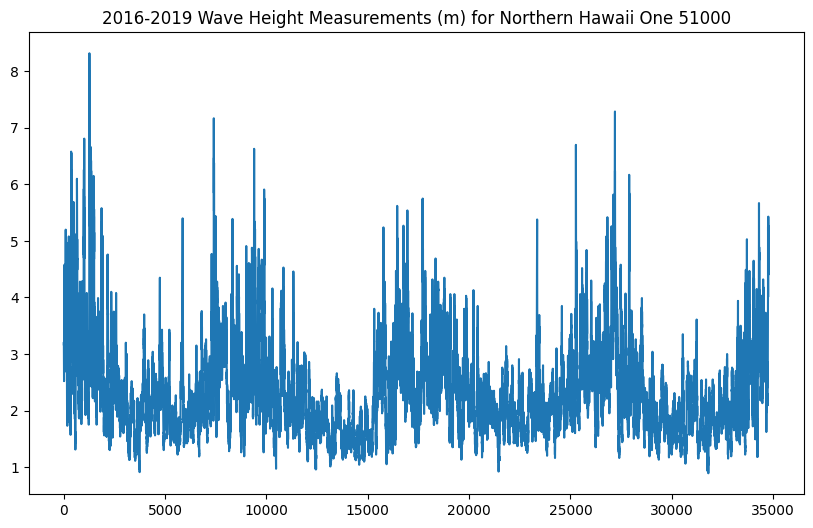

In [15]:
df2016_2019_merged ['WVHT'] = df2016_2019_merged ['WVHT'].astype(float) # changing the datatype for WVHT for a nicer look on the plot
plt.figure(figsize=(10,6)) # setting up the dimentions for our plot
plt.title('2016-2019 Wave Height Measurements (m) for Northern Hawaii One 51000') # setting up a title
plt.plot(df2016_2019_merged ['WVHT']) # plotting our data

#ARIMA MODEL

In [16]:
df2016_2019_merged_tts = df2016_2019_merged['WVHT']
df2016_2019_merged_train = df2016_2019_merged_tts[:int(len(df2016_2019_merged)*0.8)] # selecting 80% of arima_data for training
df2016_2019_merged_test = df2016_2019_merged_tts[int(len(df2016_2019_merged)*0.8):] # selecting the last 20% of data for testing

In [17]:
print(len(df2016_2019_merged_train)) # printing the length of arima_train
print(len(df2016_2019_merged_test)) # printing the length of arima_test
print(len(df2016_2019_merged)) # arima_train + arima_test should equal arima_data

27812
6954
34766


In [18]:
adf_test = adfuller(df2016_2019_merged['WVHT']) # performing adf test
print('ADF Statistic: ', adf_test[0]) # printing results
print('P-value: ', adf_test[1])

ADF Statistic:  -13.128590501222602
P-value:  1.5110450361652353e-24


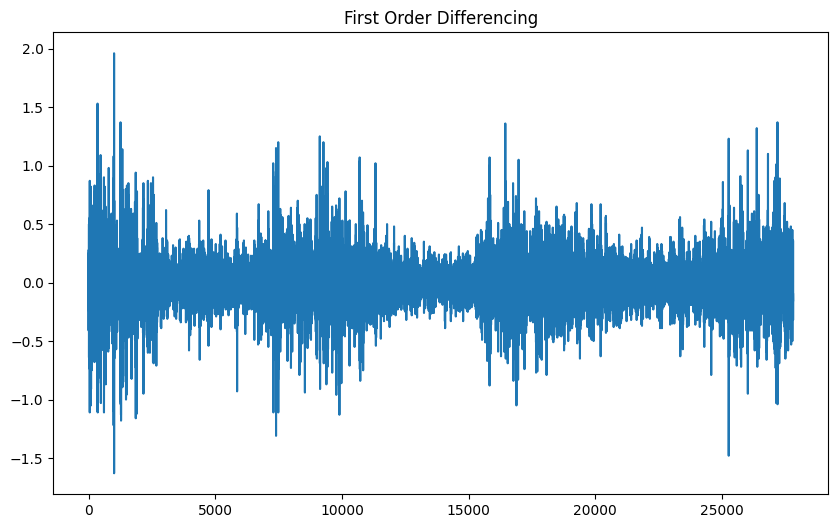

In [19]:
df2016_2019_merged_train_diff = df2016_2019_merged_train.diff().dropna() # first order differencing

plt.figure(figsize=(10, 6)) # setting up plot size
plt.title('First Order Differencing')
plt.plot(df2016_2019_merged_train_diff) # plotting differencing results

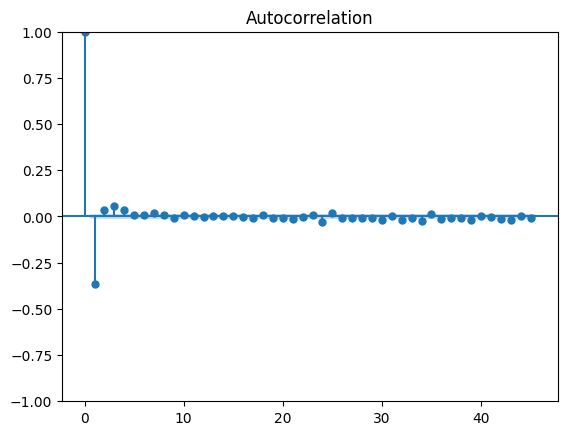

In [20]:
acf_plot = plot_acf(df2016_2019_merged_train.diff().dropna()) # autocorrelation plot using training data

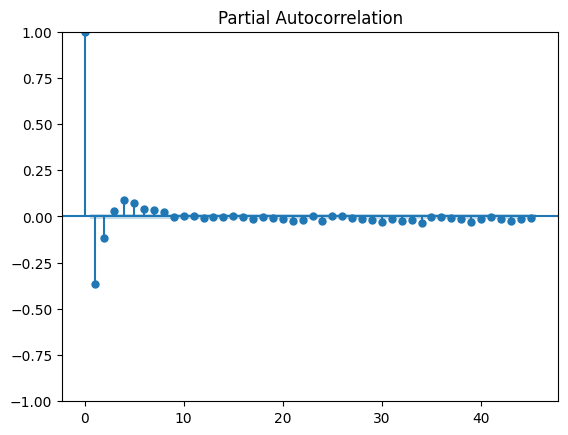

In [21]:
pacf_plot = plot_pacf(df2016_2019_merged_train.diff().dropna()) # partial autocorrelation plot on training data

In [39]:
import pmdarima as pm # importing the package

auto_arima = pm.auto_arima(df2016_2019_merged_train, stepwise = False, seasonal = False) # using auto arima on the training data

auto_arima # printing variable

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)

In [25]:
waveheight_values = df2016_2019_merged.WVHT
history = [x for x in df2016_2019_merged_train]
predictions = list()
for t in range(len(df2016_2019_merged_test)):
  model = ARIMA(history, order=(1,1,4)) # input the paramaters here within order=()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = df2016_2019_merged_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))


KeyError: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle # package used to pickle
from statsmodels.tsa.arima.model import ARIMA # ARIMA model package

In [ ]:
with open('arima_model.pkl', 'wb') as file:
  pickle.dump(model_fit, file) # change model_fit to the name of your model

ValueError: x and y must have same first dimension, but have shapes (6954,) and (1,)

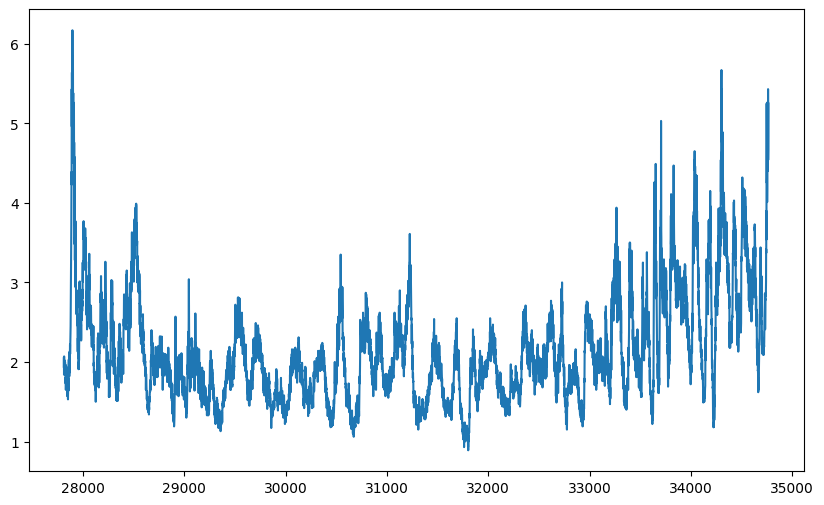

In [26]:
test_x = df2016_2019_merged_test.index # creating an index variable so that it's the dates

plt.figure (figsize=(10,6)) # setting up the plot size

plt.plot(test_x, df2016_2019_merged_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot

plt.xticks(rotation=45) # rotating the x labels for better visualization

plt.show()

ValueError: x and y must have same first dimension, but have shapes (6954,) and (1,)

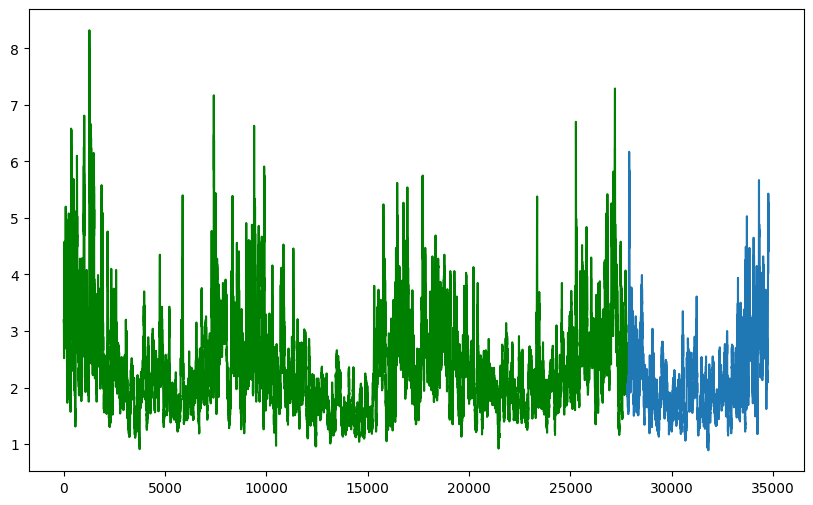

In [27]:
train_x = df2016_2019_merged_train.index # creating an index variable for training
test_x = df2016_2019_merged_test.index # creating an index variable for testing
plt.figure (figsize=(10,6)) # setting up the plot size
plt.plot(train_x, df2016_2019_merged_train, color = 'green', label = 'Training') # plotting training values
plt.plot(test_x, df2016_2019_merged_test, label='Expected') # plotting expected values
plt.plot(test_x, predictions, color='red', label='Prediction') # plotting predicted values
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Difference Between Predicted and Actual Wave Heights')
plt.legend() # adding a legend to the plot
plt.xticks(rotation=45) # rotating the x labels for better visualization
plt.show()

In [28]:
mae = mean_absolute_error(df2016_2019_merged_test, predictions) # calculating mean absolute error
r_sq = r2_score(df2016_2019_merged_test, predictions) # calculating root squared value
print('Test MAE: ', mae)
print('Test R^2: ', r_sq)

ValueError: Found input variables with inconsistent numbers of samples: [6954, 1]